In [717]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [718]:
athletes = pd.read_csv('athlete_events.csv')
athletes.shape

(271116, 15)

In [719]:
Population = pd.read_csv('WorldPopulation.csv')
Population.shape

(217, 62)

In [720]:
Population.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 61'], axis = 1, inplace=True)

In [721]:
Population.sample(3)

,Country,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
124,Maldives,MDV,89887.0,92350.0,94938.0,97584.0,100214.0,102766.0,105190.0,107538.0,...,349000.0,362000.0,360000.0,367000.0,377000.0,385000.0,393000.0,401000.0,409163.0,417492
85,Haiti,HTI,3866159.0,3943364.0,4022593.0,4103730.0,4186640.0,4271133.0,4357484.0,4445530.0,...,9556889.0,9705029.0,9852870.0,9999617.0,10145054.0,10289210.0,10431776.0,10572466.0,10711061.0,10847334
194,Trinidad and Tobago,TTO,848479.0,865360.0,880023.0,892569.0,903275.0,912417.0,919903.0,925909.0,...,1309260.0,1315372.0,1321618.0,1328100.0,1334788.0,1341588.0,1348248.0,1354493.0,1360092.0,1364962


In [722]:
athletes.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
251750,126088,Philippe Verneret,M,21.0,NaN,NaN,France,FRA,1984 Winter,1984,Winter,Sarajevo,Alpine Skiing,Alpine Skiing Men's Downhill,NaN
24935,13056,Hans-Jrgen Bombach,M,27.0,183.0,75.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 4 x 100 metres Relay,NaN
95435,48316,Reiner Heugabel,M,29.0,147.0,48.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN


In [723]:
city = athletes['City'] == 'Beijing'
athletes[city].head(3)
athletes[city].shape

(13602, 15)

In [724]:
Population = pd.melt(Population, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population' )

In [725]:
Population['Year'] = pd.to_numeric(Population['Year'])

In [726]:
Population.head(3)

,Country,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0


In [727]:
#a = athletes.set_index('NOC').join(population_2008.set_index('Country Code'), how='inner')

In [728]:
Population = pd.merge(Population, athletes, left_on = ['Country Code', 'Year'], right_on = ['NOC', 'Year'])

In [729]:
Population.shape

(151931, 18)

In [730]:
Population.head(4)

,Country,Country Code,Year,Population,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
0,Afghanistan,AFG,1960,8996351.0,29626,Sultan Mohammad Dost,M,28.0,168.0,73.0,Afghanistan,AFG,1960 Summer,Summer,Roma,Wrestling,"Wrestling Men's Welterweight, Freestyle",NaN
1,Afghanistan,AFG,1960,8996351.0,39922,Abdul Ghafar Ghafoori,M,22.0,172.0,70.0,Afghanistan,AFG,1960 Summer,Summer,Roma,Athletics,Athletics Men's 4 x 100 metres Relay,NaN
2,Afghanistan,AFG,1960,8996351.0,43901,Ghulam Mohiddin Gunga,M,26.0,168.0,81.0,Afghanistan,AFG,1960 Summer,Summer,Roma,Wrestling,"Wrestling Men's Light-Heavyweight, Freestyle",NaN
3,Afghanistan,AFG,1960,8996351.0,58364,Mohammad Ibrahim Kederi,M,20.0,166.0,62.0,Afghanistan,AFG,1960 Summer,Summer,Roma,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN


In [731]:
Population.to_csv('athletePopulation.csv', sep=',')

In [732]:
Population = Population.drop( ['ID','NOC','Games'], axis=1)

In [733]:
print(Population.isnull().sum())

Country              0
Country Code         0
Year                 0
Population           0
Name                 0
Sex                  0
Age                545
Height            7426
Weight            8098
Team                 0
Season               0
City                 0
Sport                0
Event                0
Medal           132298
dtype: int64


In [734]:
Population = Population[Population['Age'].notna()]
Population = Population[Population['Weight'].notna()]
Population = Population[Population['Height'].notna()]
Population['Medal'].fillna('DNW', inplace = True)

In [735]:
print(Population.isnull().sum())

Country         0
Country Code    0
Year            0
Population      0
Name            0
Sex             0
Age             0
Height          0
Weight          0
Team            0
Season          0
City            0
Sport           0
Event           0
Medal           0
dtype: int64


In [736]:
Population.shape

(143142, 15)

In [737]:
#if athlete won medals then exceed 1, if not tehn exceeds 0
Population['Medal_Won'] = np.where(Population.loc[:,'Medal'] == 'DNW', 0, 1)

    

In [738]:
medal_total = Population.groupby(['Year','Country','Population'])['Medal_Won'].agg('sum').reset_index()

In [739]:
medal_total.head()

,Year,Country,Population,Medal_Won
0,1960,Afghanistan,8996351.0,0
1,1960,Argentina,20619075.0,4
2,1960,Australia,10276477.0,42
3,1960,Austria,7047539.0,3
4,1960,Belgium,9153489.0,4


In [740]:
medal_total = medal_total.loc[medal_total['Medal_Won'] > 0, :]

In [741]:
medal_total.head()

,Year,Country,Population,Medal_Won
1,1960,Argentina,20619075.0,4
2,1960,Australia,10276477.0,42
3,1960,Austria,7047539.0,3
4,1960,Belgium,9153489.0,4
5,1960,Brazil,72207554.0,8


In [742]:
medal_total_pivot = pd.pivot_table(medal_total,
                     index = 'Country',
                     columns = 'Year',
                     values = 'Medal_Won',
                     aggfunc = 'sum',
                     margins = True).sort_values('All', ascending = False)[1:5]

medal_total_pivot.loc[:,'All']

Country
USA          3623
Australia    1153
Russia       1132
China         985
Name: All, dtype: int64

In [743]:
filter_list = ['USA', 'Australia', 'Russia']
top_countries = medal_total[medal_total.Country.isin(filter_list)]
top_countries.head()

,Year,Country,Population,Medal_Won
2,1960,Australia,10276477.0,42
47,1960,USA,180671000.0,143
53,1964,Australia,11167000.0,37
104,1964,USA,191889000.0,177
110,1968,Australia,12009000.0,51


In [744]:
import seaborn as sns


/Users/guyihan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


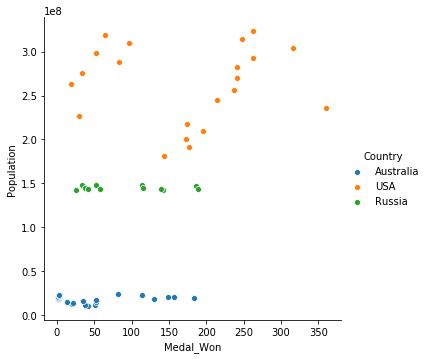

In [745]:

sns.pairplot(x_vars=["Medal_Won"], y_vars=["Population"], data=top_countries, hue="Country", size=5)


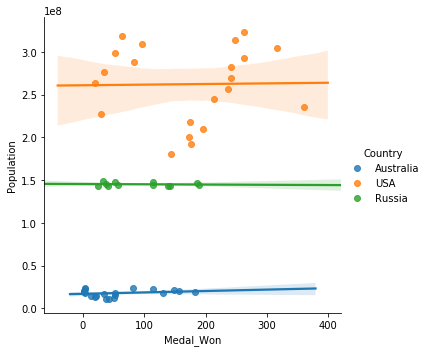

In [746]:
sns.lmplot(x="Medal_Won", y="Population", hue="Country", data=top_countries);

In [747]:
medal_mean = Population.groupby(['Year','Country','Population'])['Medal_Won'].agg('mean').reset_index()

In [748]:
medal_mean.head()

,Year,Country,Population,Medal_Won
0,1960,Afghanistan,8996351.0,0.000000
1,1960,Argentina,20619075.0,0.034483
2,1960,Australia,10276477.0,0.151625
3,1960,Austria,7047539.0,0.021277
4,1960,Belgium,9153489.0,0.026667


In [749]:
countries = ['USA', 'Australia', 'Russia']
top_countries_mean = medal_mean[medal_mean.Country.isin(countries)]
top_countries_mean.head()

,Year,Country,Population,Medal_Won
2,1960,Australia,10276477.0,0.151625
47,1960,USA,180671000.0,0.301688
53,1964,Australia,11167000.0,0.106017
104,1964,USA,191889000.0,0.285945
110,1968,Australia,12009000.0,0.221739


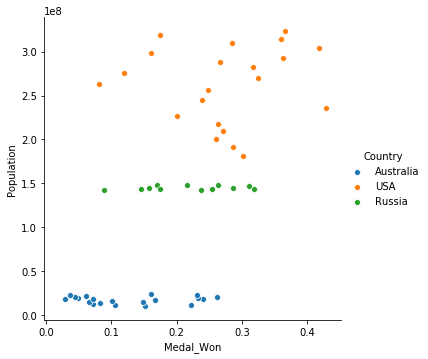

In [750]:
sns.pairplot(x_vars=["Medal_Won"], y_vars=["Population"], data=top_countries_mean, hue="Country", size=5)


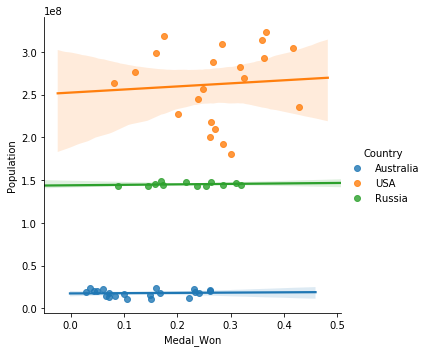

In [751]:
sns.lmplot(x="Medal_Won", y="Population", hue="Country", data=top_countries_mean);

In [752]:
medal_total = Population.groupby(['Year','Country','Population','Sport'])['Medal_Won'].agg('sum').reset_index()

In [753]:
medal_total.head()

,Year,Country,Population,Sport,Medal_Won
0,1960,Afghanistan,8996351.0,Athletics,0
1,1960,Afghanistan,8996351.0,Wrestling,0
2,1960,Argentina,20619075.0,Athletics,0
3,1960,Argentina,20619075.0,Boxing,1
4,1960,Argentina,20619075.0,Cycling,0


In [754]:
is_Swimming =  medal_total['Sport']=='Swimming'
medal_total = medal_total[is_Swimming]

In [755]:
medal_total.head()

,Year,Country,Population,Sport,Medal_Won
14,1960,Argentina,20619075.0,Swimming,0
32,1960,Australia,10276477.0,Swimming,30
51,1960,Austria,7047539.0,Swimming,0
66,1960,Belgium,9153489.0,Swimming,0
91,1960,Canada,17909009.0,Swimming,0


In [756]:
countries = ['USA', 'Australia', 'Russia','Ireland']
top_countries_mean = medal_total[medal_total.Country.isin(countries)]
top_countries_mean.head()

,Year,Country,Population,Sport,Medal_Won
32,1960,Australia,10276477.0,Swimming,30
472,1960,USA,180671000.0,Swimming,40
521,1964,Australia,11167000.0,Swimming,13
1008,1964,USA,191889000.0,Swimming,61
1055,1968,Australia,12009000.0,Swimming,18


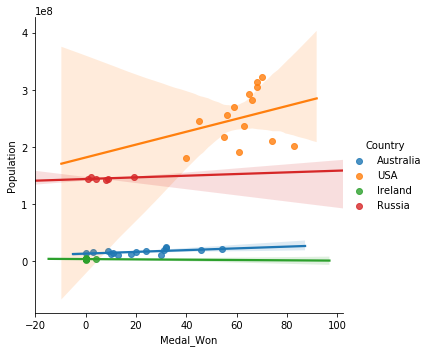

In [757]:
sns.lmplot(x="Medal_Won", y="Population", hue="Country", data=top_countries_mean);

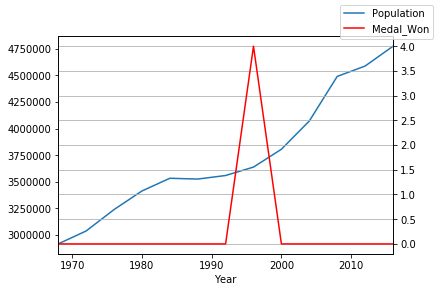

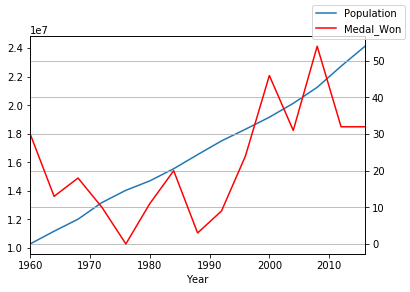

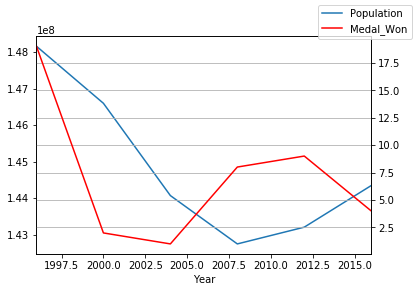

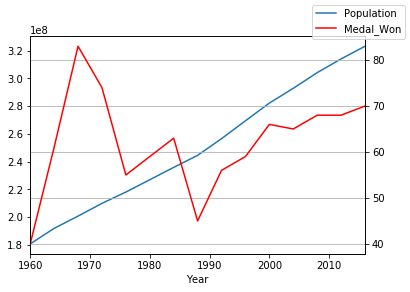

In [758]:
Ireland = medal_total[medal_total['Country'] == 'Ireland']
Australia = medal_total[medal_total['Country'] == 'Australia']
Russia = medal_total[medal_total['Country'] == 'Russia']
USA = medal_total[medal_total['Country'] == 'USA']

ax = Ireland.plot(x="Year", y="Population", legend=False)
ax2 = ax.twinx()
Ireland.plot(x="Year", y="Medal_Won", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.grid(True)


ax = Australia.plot(x="Year", y="Population", legend=False)
ax2 = ax.twinx()
Australia.plot(x="Year", y="Medal_Won", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.grid(True)

ax = Russia.plot(x="Year", y="Population", legend=False)
ax2 = ax.twinx()
Russia.plot(x="Year", y="Medal_Won", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.grid(True)

ax = USA.plot(x="Year", y="Population", legend=False)
ax2 = ax.twinx()
USA.plot(x="Year", y="Medal_Won", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.grid(True)
plt.show()

In [759]:
events = pd.pivot_table(Population,  index = ['Country', 'Year','Population'], columns = 'Medal', values = 'Medal_Won', aggfunc = 'sum',fill_value = 0).drop('DNW', axis = 1).reset_index()

#events = events.loc[events['Gold'] > 0, :]

Country = events['Country'].unique()

year = events['Year'].unique()


In [760]:
events.head()

Medal,Country,Year,Population,Bronze,Gold,Silver
0,Afghanistan,1960,8996351.0,0,0,0
1,Afghanistan,1964,9731361.0,0,0,0
2,Afghanistan,1968,10604346.0,0,0,0
3,Afghanistan,1972,11721940.0,0,0,0
4,Afghanistan,1980,13248370.0,0,0,0


In [761]:
events['Grade'] = np.where((events['Gold']>0) | (events['Silver']>0) | (events['Bronze']>0), events['Gold']*3+events['Silver']*2+events['Bronze'],0)


In [762]:
events.head()

Medal,Country,Year,Population,Bronze,Gold,Silver,Grade
0,Afghanistan,1960,8996351.0,0,0,0,0
1,Afghanistan,1964,9731361.0,0,0,0,0
2,Afghanistan,1968,10604346.0,0,0,0,0
3,Afghanistan,1972,11721940.0,0,0,0,0
4,Afghanistan,1980,13248370.0,0,0,0,0


In [763]:
countries = ['USA', 'Australia', 'Russia']
top_countries = events[events.Country.isin(countries)]
top_countries.head()

Medal,Country,Year,Population,Bronze,Gold,Silver,Grade
69,Australia,1960,10276477.0,11,10,21,83
70,Australia,1964,11167000.0,26,8,3,56
71,Australia,1968,12009000.0,11,5,35,96
72,Australia,1972,13177000.0,2,11,7,49
73,Australia,1976,14033000.0,7,0,15,37


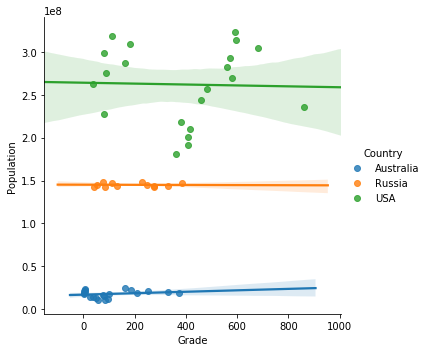

In [764]:
sns.lmplot(x="Grade", y="Population", hue="Country", data=top_countries);

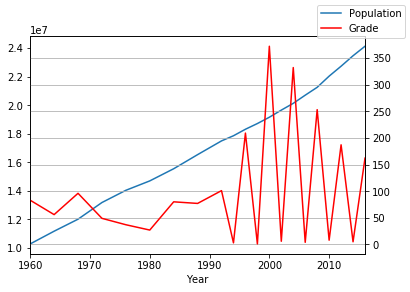

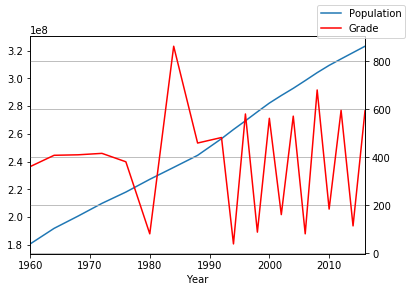

In [767]:
Australia = top_countries[top_countries['Country'] == 'Australia']
Russia = top_countries[top_countries['Country'] == 'Russia']
USA = top_countries[top_countries['Country'] == 'USA']

ax = Australia.plot(x="Year", y="Population", legend=False)
ax2 = ax.twinx()
Australia.plot(x="Year", y="Grade", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.grid(True)

ax = USA.plot(x="Year", y="Population", legend=False)
ax2 = ax.twinx()
USA.plot(x="Year", y="Grade", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.grid(True)

